# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/IRIS.csv')

In [4]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# **Visualization of Dataset**

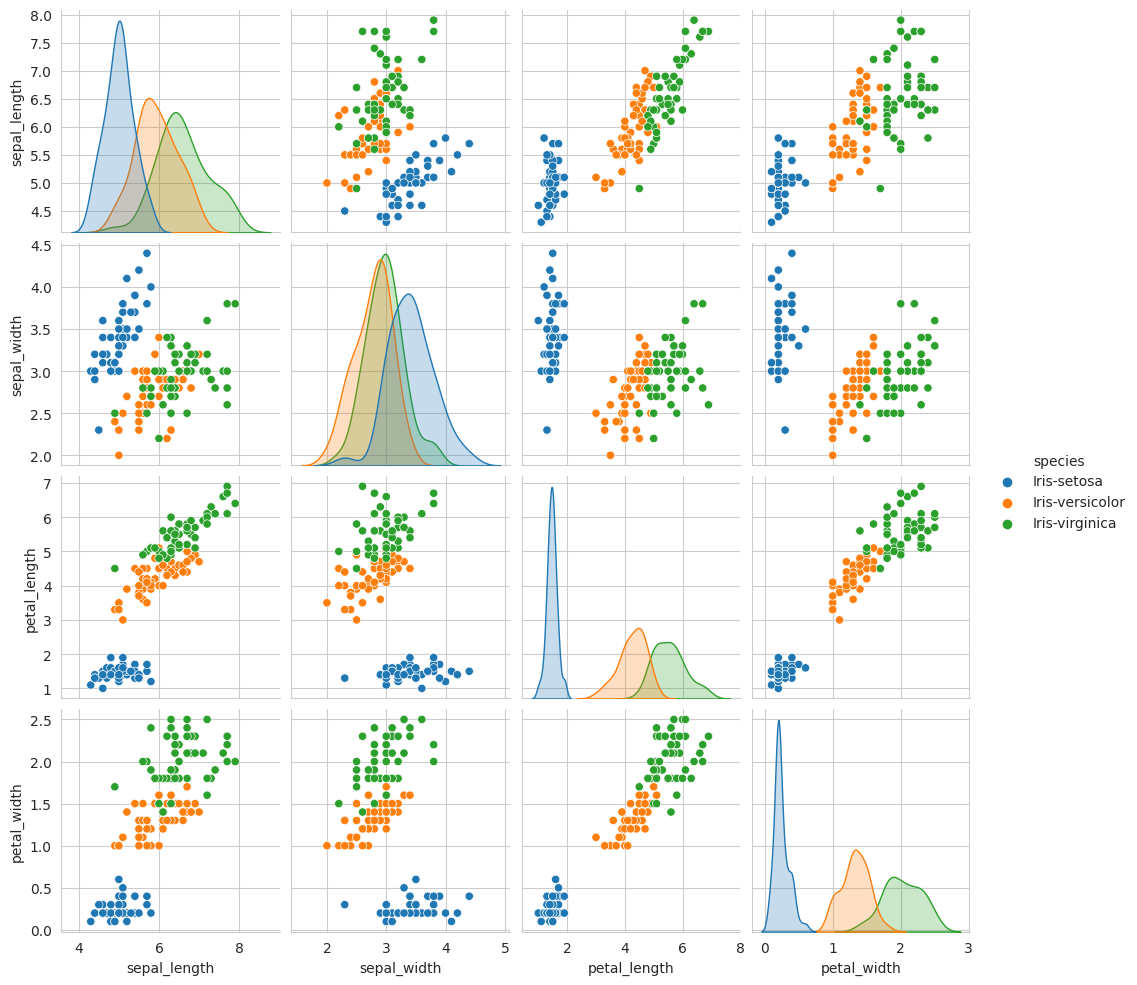

In [13]:
sns.set_style("whitegrid")
sns.pairplot(df, hue = 'species')

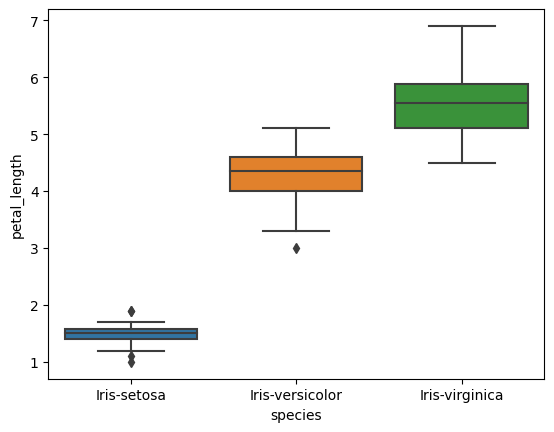

In [11]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

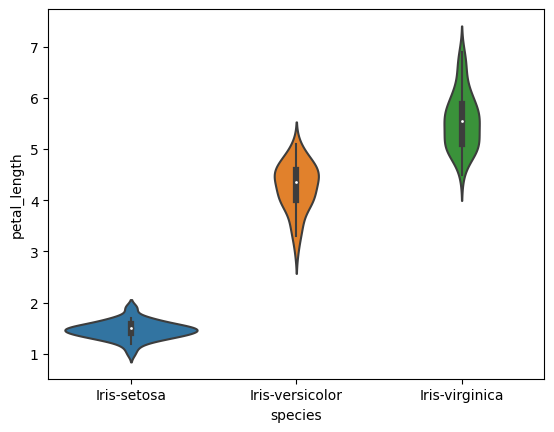

In [12]:
sns.violinplot(x="species",y="petal_length",data=df)
plt.show()

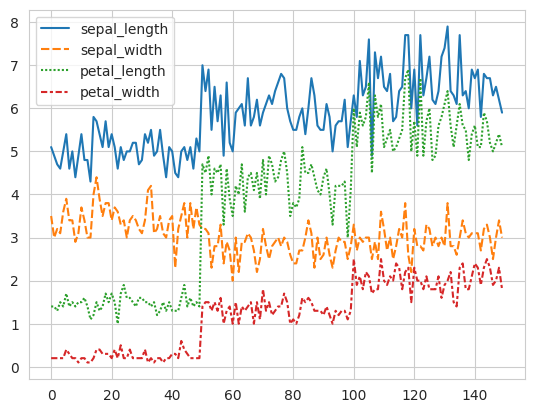

In [25]:
sns.lineplot(data=df.drop(['species'], axis=1))
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

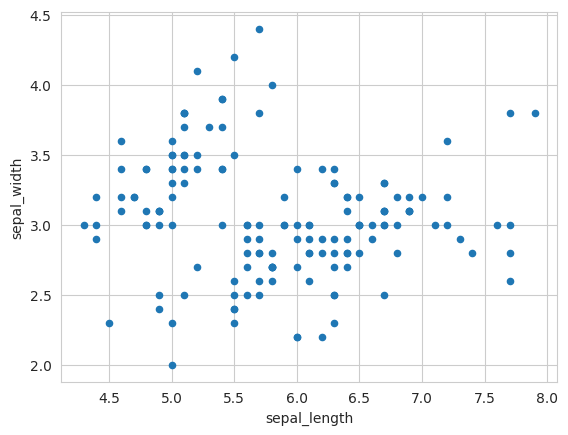

In [18]:
df.plot(kind="scatter", x="sepal_length", y="sepal_width")

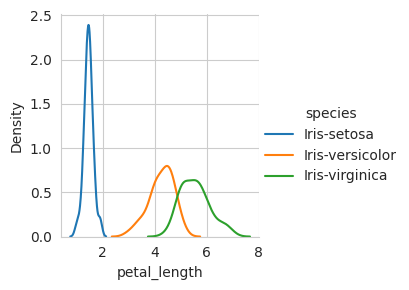

In [20]:
sns.FacetGrid(df, hue="species") \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

<ipython-input-26-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


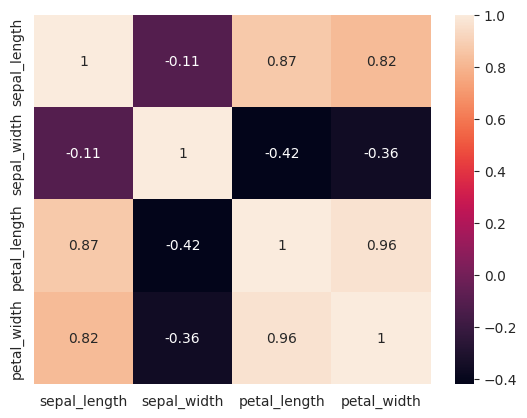

In [26]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Training the model**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
features = df[['sepal_length','sepal_width','petal_length','petal_width']]
labels = df["species"]

In [38]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.33,random_state=42)

# **DecisionTree**

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.98

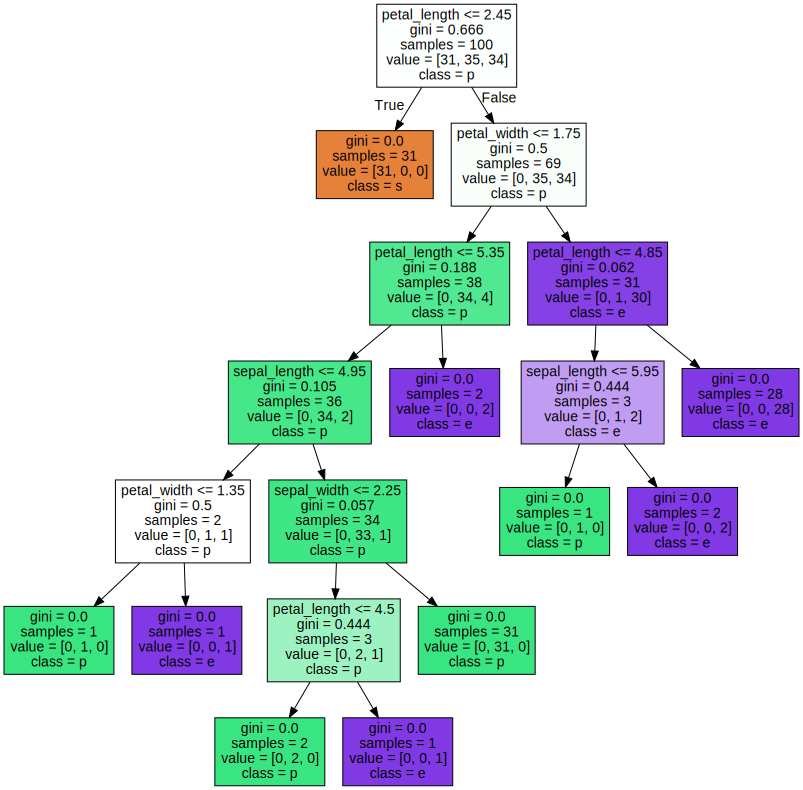

In [43]:
import graphviz
from sklearn import tree
#Dot Data
dot_data = tree.export_graphviz(dt,out_file=None,
                                feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
                                class_names = "species",
                                filled=True)
#Draw graph
graph = graphviz.Source(dot_data,format = "png")
graph

# **K-Means**

In [45]:
from sklearn.cluster import KMeans
# Define the mapping dictionary
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Apply the mapping to the 'Species' column
df['species_Category'] = df['species'].map(mapping)



# Separate the features from the target variable
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Perform clustering using K-means
kmeans = KMeans(n_clusters=3, random_state= 21)
kmeans.fit(features)
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
total_cluster = df['Cluster'].sum()
total_Species_Category = df['species_Category'].sum()

print ("accuracy is =", total_cluster / total_Species_Category * 100 ,"%")

accuracy is = 84.0 %
